# Basics, algorithms

Welcome to the first jupyter notebook! In this session, we won't go into too many minute details yet, but will cover the basics of machine learning. We've tried to keep it as simple as possible, also because many might only have little experience with python and/or programming a 'learning machine'. If it looks like you're gonna be through the content of this notebook in ten minutes or so, because you're already familiar with all of its concepts, then feel free to start making changes to this notebook, ask more in-depth questions or do some last-minute tweaking of your group presentations.

## Setup

To allow the next code blocks to run smoothly, this section adjusts a couple of settings.

Some imports that we will be using:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Set the random seed to a fixed number. This will guarantee that the notebook output is generated the same way for every run, otherwise the seed would be – random, as the name suggests.

In [2]:
np.random.seed(42)

Set the output precision of numpy for a little prettier output.

In [3]:
np.set_printoptions(precision=3, suppress=True)

Some figure plotting settings: increase the axis labels of our figures a bit.

In [4]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Linear regression with the normal equation

Let's start with something simple: linear regression. As we've learnt before, we can use the _normal equation_ to calculate a prediction. In statistics, we usually label this as $\hat{\theta}$, because it is an estimator for the parameter vector $\theta$ of the model. The hat indicates that it's an estimator.

 First we need to generate some random data.

In [5]:
m = 100   # number of data points
X = 2 * np.random.rand(m, 1)
y = 3 + 4 * X + np.random.randn(m, 1)

And let's plot it to get an idea what we're looking at. Of course, we do things the proper way, and put labels on our axes!

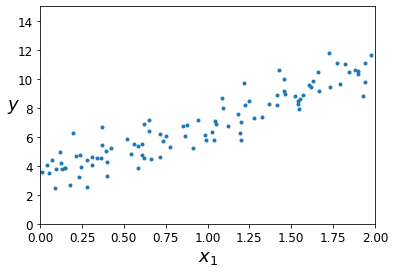

In [6]:
plt.plot(X, y, ".")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

We can also print a few of the generated data values, just to get an idea what we're talking about. The following command shows us the first three entries of the object `X` that we just generated:

In [7]:
X[0:3]

array([[0.749],
       [1.901],
       [1.464]])

And this will show us the first three corresponding entries in the object `y`:

In [8]:
y[0:3]

array([[ 6.083],
       [10.307],
       [ 8.948]])

Looks good!

What is the normal equation? And what are `X` and `y`?

$$ \hat{\theta} = \left( \mathbf{X}^T \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

Quick refresher if your memory is a little rusty:
* $\hat{\theta}$ is our estimator for the vector of parameters, $\theta$. This is what we want to calculate!
* $\mathbf{x}^{(i)}$, beware that it's lower-case, is a vector which contains all features of the training instance with index i. In the data generated above, we only have one 'feature', which is called $x_1$. So, $\mathbf{x}^{(0)}$, the feature vector of instance number zero, includes one single value: the value of $x_1$ for that instance, as printed out with the commands above.
* $\mathbf{X}$, now it's upper-case, is a vector of _all feature vectors_ $\mathbf{x}^{(i)}$. To make things more confusing, the entries of $\mathbf{X}$ are actually not $\mathbf{x}^{(i)}$, but the transposed vectors $(\mathbf{x}^{(i)})^T$.
* $\mathbf{y}$ are the _true_ target values of the instances. So, this is also a vector with the same dimension as $\mathbf{X}$. But even in more complicated data structures of the features, every entry of $\mathbf{y}$ will just be the one target value.

Now, what can we do with the normal equation? And what _is_ actually this $\theta$? It's our vector of model parameters. The above case is very simple: we want to create a model that represents the data as good as possible. With just looking at the plot, and without too much thinking, it's obvious that there is some sort of linear dependence between $x_1$ and $y$.

How many parameters do we need to describe this model? Probably two: one for the linear dependence, and one _bias term_ to shift the entire model along the y axis. So, our $\theta$ in this case is just a vector of two entries, and the goal of 'linear regression' is to find the optimal values of the two. And actually, if you scroll back up for a bit, you can already see the linear dependence, when we generated the data:

$$ y(x_1) = 3 + 4 \cdot x_1 $$

But let's pretend we don't know that ... Without using any machine learning yet, we can just use the above normal equation to get estimators for the two values. For that, we can make use of numpy's `linalg.inv()` function to invert matrices. Essentially, we then just need to 'type' the above formula into python and let it do some magic. Easy, right?

One more step is necessary: we need to append an additional feature $x_0 = 1$ to all instances, because otherwise we would ignore the bias parameter in our calculation:

In [9]:
X_b = np.c_[np.ones((m, 1)), X]

Cool. Now, here's the typed-out formula for calculating the normal equation. It only uses numpy functions, such as the matrix inversion, or the calculation of dot products:

In [10]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

How do we know it worked? One easy thing is to check what the values of the two parameters are:

In [11]:
print("theta_0 = {:.3f}".format(theta[0][0]))
print("theta_1 = {:.3f}".format(theta[1][0]))

theta_0 = 3.215
theta_1 = 3.770


Reminder: the values we used to generate the data are 3 and 4.

Ok, that's not perfect, but close. Where does the difference come from? Probably from the fact that our data 'only' consists of 100 data points. the more data points we use, the closer we get to the values that we used to generate the data with.

Maybe it is also useful to plot the prediction as a line into the plot. For that, we should first calculate the predictions for the value of `y` for all our instances:

In [12]:
y_predict = X_b.dot(theta)

And now we can do the plotting:

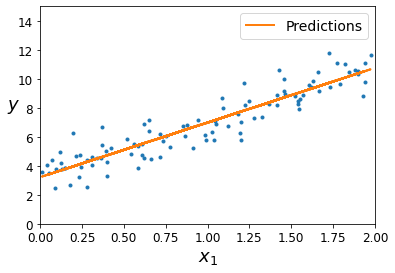

In [15]:
plt.plot(X, y, ".")
plt.plot(X, y_predict, "-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Great! As a quick summary: we generated random data in python, determined an appropriate model to represent that data (by eye-balling very carefully), and used the normal equation to get estimators for our model parameters. Now, let's start with some actual machine learning.

## Linear regression using batch gradient descent

Let's try and implement the first machine-learning algorithm to solve our linear-regression problem: batch gradient descent. Quick reminder: gradient descent is an iterative approach to find $\hat{\theta}$. Using the learning rate $\eta$, we adjust our estimates for $\theta$ in each learning step iteratively. The 'direction' of adjustment is determined by the _gradient_ of the mean square error.

Maybe we should have a quick revision of the formula:

$$ \mathit{MSE}(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right)^2 $$
Now, most of you will probably know that the gradient of this function just means taking the derivative of it with respect to $\theta_1,\dots,\theta_n$. To refresh your memory, let's write down the formula for the partial derivative as well:

$$ \frac{\partial}{\partial \theta_j} \mathit{MSE}(\theta) = \frac{2}{m} \sum_{i=1}^{m} \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)}$$
Then, the entire gradient is:

$$ \nabla_\theta \mathit{MSE}(\theta) = \frac{2}{m} \mathbf{X}^T \cdot \left( \mathbf{X} \cdot \theta - \mathbf{y} \right) $$
Now it's really just one last step missing: we need to calculate our predictions for $\theta$. For the very first step, we start with random values of $\theta$. Then, after calculating the gradient above for a step, we update the value of $\theta$ according to:

$$ \theta \rightarrow \theta - \eta \nabla_\theta \mathit{MSE}(\theta) $$

That wasn't too hard, was it? Writing this out with python is even easier. Let's start with setting a learning rate $\eta$:

Maybe we should have a quick revision of the formula:

$$ \mathit{MSE}(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right)^2 $$

Now, most of you will probably know that the gradient of this function just means taking the derivative of it with respect to $\theta_1,\dots,\theta_n$. To refresh your memory, let's write down the formula for the partial derivative as well:

$$ \frac{\partial}{\partial \theta_j} \mathit{MSE}(\theta) = \frac{2}{m} \sum_{i=1}^{m} \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)}$$ 

Then, the entire gradient is:

$$ \nabla_\theta \mathit{MSE}(\theta) = \frac{2}{m} \mathbf{X}^T \cdot \left( \mathbf{X} \cdot \theta - \mathbf{y} \right) $$

Then, we also need to decide how many steps of calculations we would like to perform:

That wasn't too hard, was it? Writing this out with python is even easier. Let's start with setting a learning rate $\eta$:

And initialise our $\theta$ with random values:

Then, we also need to decide how many steps of calculations we would like to perform:

Then, it's really just creating a small loop and implementing the calculation of the gradients, and then updating $\theta$:

And initialise our $\theta$ with random values: 

Cool, but did it do anything? We should probably check the values for $\theta$ once again:

Then, it's really just creating a small loop and implementing the calculation of the gradients, and then updating $\theta$:

You might be surprised to see that these values basically are exactly the same as those obtained with the normal equation. That's because our estimate, as much as before, completely depends on the data points we fed into the model. You can go to the earlier cells, change some of the parameters, and run the code again. Does anything change, for example when adjusting to use a larger/smaller dataset (the m parameter)?

Now, the implementation of batch gradient descent looks rather simple, but it's really not that obvious what happens in each step of the iteration. Remember: we look at the data points one thousand times, calculate some gradient one thousand times, update our estimate for $\theta$ one thousand times, and only see the final result of that final step.

Ignore the details of the following code (unless you're really interested of course). But here's what it does: we repeat the batch gradient descent method on the same dataset as before, but with different learning rates. When you execute the code, you'll see that the model with a very low learning rate only very slowly 'approaches' the dataset. The second one seems to be a lot faster in comparison. The third one, however, 'overshooots' the data with its very large learning rate. The model still converges, but it jumps around quite a bit.

Cool, but did it do anything? We should probably check the values for $\theta$ once again:

Try out different learning rates and see what happens. You'll notice that – at very large rates – the model won't converge.

## Stochastic Gradient Descent

At this point, you'll probably know about the most problematic aspect of BGD already: we always evaluate the entire dataset at every step of the training process. That's perfect for smaller datasets, because the model will usually find the 'best' estimate for $\theta$ possible (similar to what the normal equation does). However, this is not very feasible for huge datasets.

An alternative in that case is the stochastic gradient descent (SGD) method. As opposed to batch gradient descent, the stochastic technique picks one instance from the dataset randomly and adjusts the estimate for $\theta$ according to that instance. This means a lot of jumping around, because we follow the randomness of individual instances. On the other hand, it's computationally very inexpensive. And if it's done right, it can still find the 'best' estimate possible. However, it will never converge to that 'best' estimate per se. One common technique to overcome this problem is to adjust the learning rate according to a schedule during the training process. That is, start with a high learning rate and decrease it constantly to help the model to 'settle' in the global minimum.

Back to hands-on experience. Let's first decide for how many epochs we would like to evaluate. The idea for this is that, despite an instance being picked randomly at every step, we would still want to evaluate them in sets of a certain size (which is usually just the size of the training data). Once we did, we call that an epoch and jump to the next one.

## Stochastic Gradient Descent

At this point, you'll probably know about the most problematic aspect of BGD already: we always evaluate the _entire_ dataset at every step of the training process. That's perfect for smaller datasets, because the model will usually find the 'best' estimate for $\theta$ possible (similar to what the normal equation does). However, this is not very feasible for huge datasets.

An alternative in that case is the _stochastic gradient descent_ (SGD) method. As opposed to batch gradient descent, the stochastic technique picks one instance from the dataset _randomly_ and adjusts the estimate for $\theta$ according to that instance. This means _a lot_ of jumping around, because we follow the randomness of individual instances. On the other hand, it's computationally very inexpensive. And if it's done right, it can still find the 'best' estimate possible. However, it will _never_ converge to that 'best' estimate per se. One common technique to overcome this problem is to adjust the learning rate according to a _schedule_ during the training process. That is, start with a high learning rate and decrease it constantly to help the model to 'settle' in the global minimum.

Back to hands-on experience. Let's first decide for how many _epochs_ we would like to evaluate. The idea for this is that, despite an instance being picked randomly at every step, we would still want to evaluate them in sets of a certain size (which is usually just the size of the training data). Once we did, we call that an epoch and jump to the next one.

In [ ]:
n_epochs = 50

Then, we should implement this learning-rate scheduling, because otherwise our model would not converge. Let's write a simple function to return a learning rate with two parameters:

In [ ]:
t0, t1 = 5, 50  
def learning_schedule(t):
    return t0 / (t + t1)

Once again, we'll have to initialise our $\theta$ randomly before the first calculation:

In [ ]:
theta = np.random.randn(2,1)

Then we can do the actual implementation of the loops:

In [ ]:
# Create a loop over the number of epochs.
for epoch in range(n_epochs):
    # And a loop over the size of the training data.
    for i in range(m):
        # Pick a random instance: this function takes
        # a random value in the range from 0 to m.
        random_index = np.random.randint(m)
        
        # Now, store this random instance and its target
        # value into the variables xi and yi ...
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # ... and calculate gradients and theta as before.
        # Remember to calculate the value of the learning
        # rate from the learning-rate schedule defined
        # above (epoch * m + i) is just the number of the
        # current training step over all epochs.
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

We should probably check the values for $\theta$ once again:

In [ ]:
print("theta_0 = %s" % theta[0][0])
print("theta_1 = %s" % theta[1][0])

Great, it worked! The result seems to be similar, but not the same as before. Try changing some of the parameters. For instance, increase the number of epochs. Will we eventually reach the values from before? Remember: once we reach one thousand (!) epochs, we will have seen the same number of instances as if we had done one thousand iteration steps in the BGD method. Another thing you could try: change the learning-rate schedule (for example: turn it off). 

As an alternative, we can also use the _Scikit Learn_ library for stochastic gradient descent. Scikit Learn provides a plethora of functions and implementation of machine-learning models, and we will keep using it in more examples later. Of course, it might sometimes be helpful to implement algorithms yourself, but taking them from a library with dozens of experts working on them every day, doesn't sound too bad of an idea either.

For stochastic gradient descent, Scikit Learn provides a class called [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). The good thing about this class is that we can just give it a bunch of parameters (many others will also be set by default), and then the class is ready to do exactly what we need.

First, we need to _import_ the class from Scikit Learn, then we can _instantiate_ it:

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, eta0=0.1, penalty=None)

We have already set a few parameters up there: we would like fifty epochs, and start with a learning rate $\eta$ of 0.1. The Scikit Learn implementation uses learning-rate scheduling by default. We also need to set `penalty` explicitly, because otherwise Scikit Learn would otherwise use $\ell_2$ regularisation.

Then, the only thing left is to perform the actual training, by giving it our training data (this will also show you all parameters of our model):

In [ ]:
sgd_reg.fit(X, y.ravel())

And what does it predict?

In [ ]:
print("theta_0: %s" % sgd_reg.intercept_[0])
print("theta_1: %s" % sgd_reg.coef_[0])

To visualise the randomness of SGD, let's create some plot again. Again, you may just ignore the details of the following code:

In [ ]:
theta_path_sgd = []
theta = np.random.randn(2,1)
n_epochs = 50

t0, t1 = 10, 50  
def learning_schedule(t):
    return t0 / (t + t1)

thetas = []

plt.figure(figsize=(12,6))
plt.subplot(121)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 10:
            y_predict = X_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X, y_predict, style)
            
        random_index = np.random.randint(m)     
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        thetas.append(theta)
        if epoch == 0 and i < 200: theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.subplot(122)
plt.plot([i[0] for i in thetas])
plt.plot([i[1] for i in thetas])
plt.axis([0, 500, 1, 7])
plt.xlabel("$n_{iterations}$", fontsize=18)
plt.ylabel("$\\theta_0$, $\\theta_1$", fontsize=18)
plt.show()

## Mini-batch gradient descent

By 'taking the best of both worlds', the _mini-batch gradient descent_ might be the perfect compromise between BGD and SGD. Instead of taking all or just one instance, the gradient is evaluated on a _mini-batch_ of instances. This makes it a little more stable than SGD, especially with large mini-batches. And it allows for vectorisation optimisations in terms of computing. It has the same 'issue' as SGD, however, that it never stops at the optimal values for the estimators, but keeps jumping around the global minimum. Therefore, a good learning schedule is pivotal to implement this technique successfully.

Let's first fix some parameters: the number of epochs, and the size of the mini batches:

In [ ]:
n_epochs = 50
minibatch_size = 20

Then, implement learning-rate scheduling as before:

In [ ]:
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

Make sure to initialise the values of $\theta$ randomly in the beginning:

In [ ]:
theta = np.random.randn(2,1)

A small helper function to give us randomly shuffled instances. We shuffle the instances for every new epoch to make sure we will always look at 'new' mini batches for every epoch. Otherwise, we would end up looking at all instances in the same order in all epochs.

In [ ]:
def shuffled_instances(m, X_b, y):
    shuffled_indices = np.random.permutation(m)
    return X_b[shuffled_indices], y[shuffled_indices]

Now we can do the actual looping:

In [ ]:
# Count the number of steps for the learning-rate schedule.
step = 0

# Loop over all epochs.
for epoch in range(n_epochs):
    # Start off every epoch by shuffling around the instances.
    X_b_shuffled, y_shuffled = shuffled_instances(m, X_b, y)
    
    # Loop over all instances in mini batches.
    for i in range(0, m, minibatch_size):
        step += 1
        
        # Before we can calculate the gradients, make sure we
        # get the mini-batch subset of instances.
        xi = X_b_shuffled[step:step+minibatch_size]
        yi = y_shuffled[step:step+minibatch_size]
        
        # Then, calculate the gradient and update theta as before.
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(step)
        theta = theta - eta * gradients

And what are the predicted values of the parameters?

In [ ]:
print("theta_0: %s" % theta[0][0])
print("theta_1: %s" % theta[1][0])

The following code won't produce any output, but please run it quickly for the last part of this notebook.

In [ ]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

step = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        step += 1
        xi = X_b_shuffled[step:step+minibatch_size]
        yi = y_shuffled[step:step+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(step)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

## Comparing BGD, SGD and mini-batch GD

We're almost done, but let's quickly have a look at what the algorithms actually do in the parameter space. The following code produces a plot that points out every step the batch gradient descent, stochastic gradient descent, and mini-batch gradient descent methods took. Do you spot any differences?

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.0, 4.0, 2.5, 5.0])
plt.show()